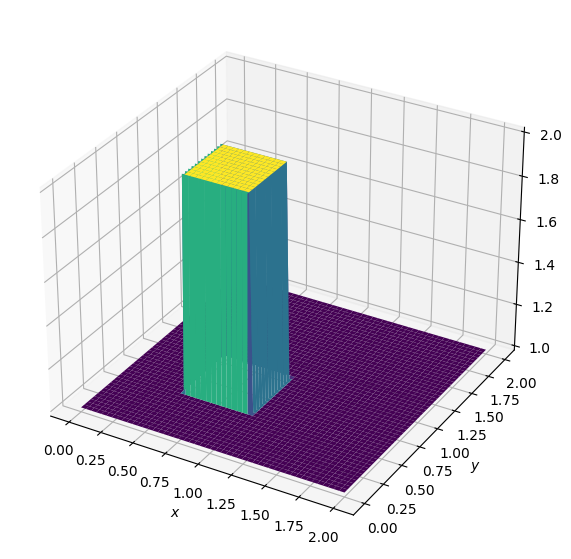

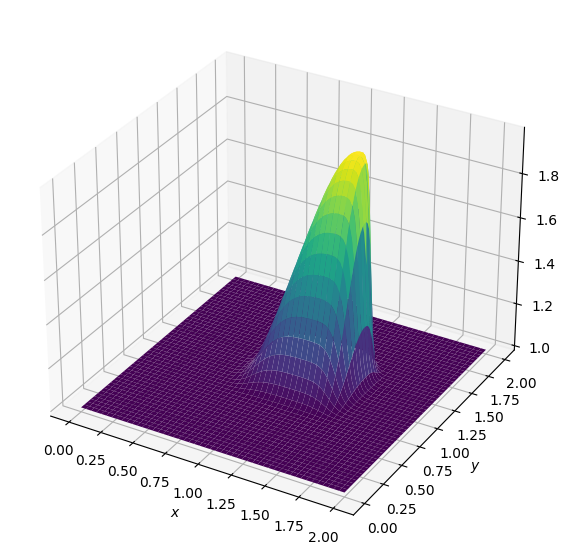

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Discretization variables
nx, ny = 101, 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

# Initialize grid and solution arrays
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)
u = np.ones((ny, nx))
v = np.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2
v[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# Plot initial condition
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Solver
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1


# Plot solution
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis', rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Show the plots
plt.show()
